In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train =pd.read_csv("/content/Train.csv")

In [6]:
test =pd.read_csv("/content/Test.csv")

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train.shape , test.shape
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
train.dtypes, test.dtypes

(Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object
 Outlet_Location_Type          object
 Outlet_Type                   object
 Item_Outlet_Sales            float64
 dtype: object, Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object
 Outlet_Location_Type          object
 Outlet_Type                   object
 dtype: object)

In [13]:
train['source']='train'
test['source']='test'
combi = pd.concat([train, test], ignore_index = True)
combi.head()
combi.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


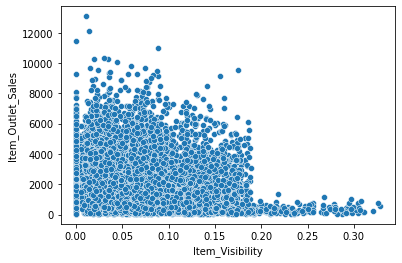

In [14]:
sns.scatterplot(train["Item_Visibility"], train["Item_Outlet_Sales"]);

<BarContainer object of 8523 artists>

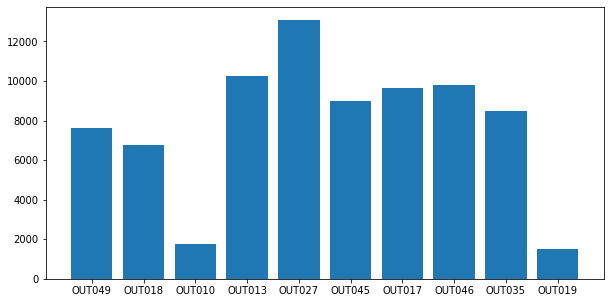

In [16]:
### Inference- values having the most sales have visibillity less than 0.2
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(train["Outlet_Identifier"],train["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 8523 artists>

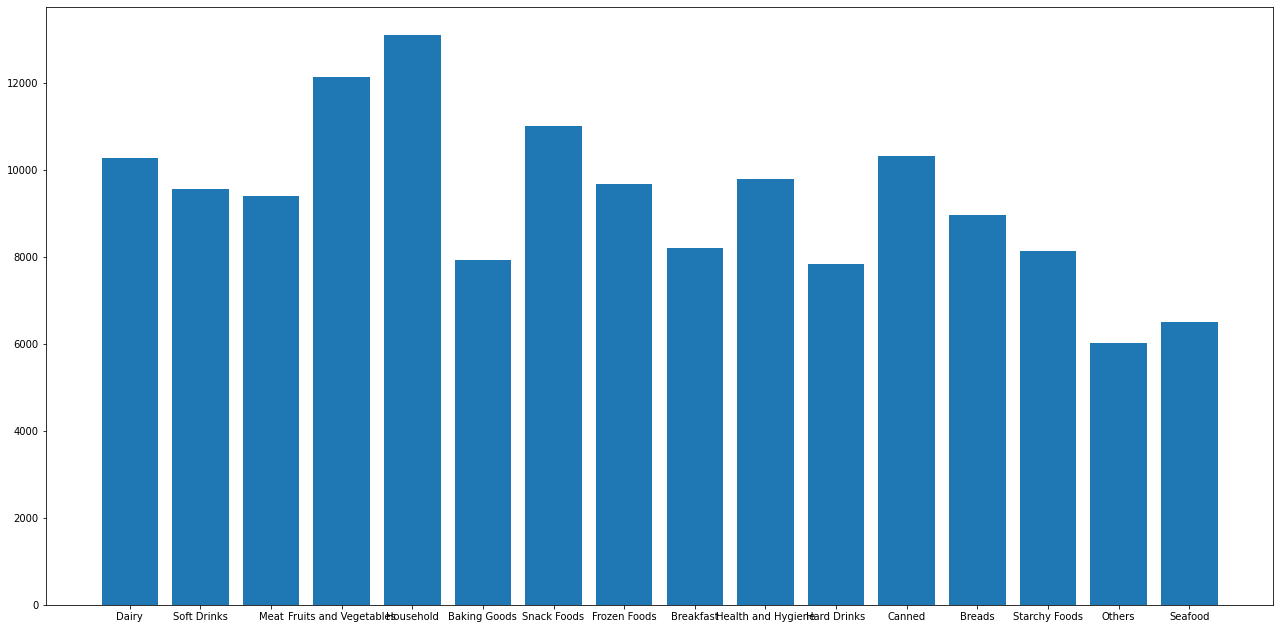

In [18]:
#plot of sales vs type of product 
fig, ax = plt.subplots(figsize=(22,11))
plt.bar(train["Item_Type"],train["Item_Outlet_Sales"], width = 0.8)

(-0.5, 15.5, 0.0, 20000.0)

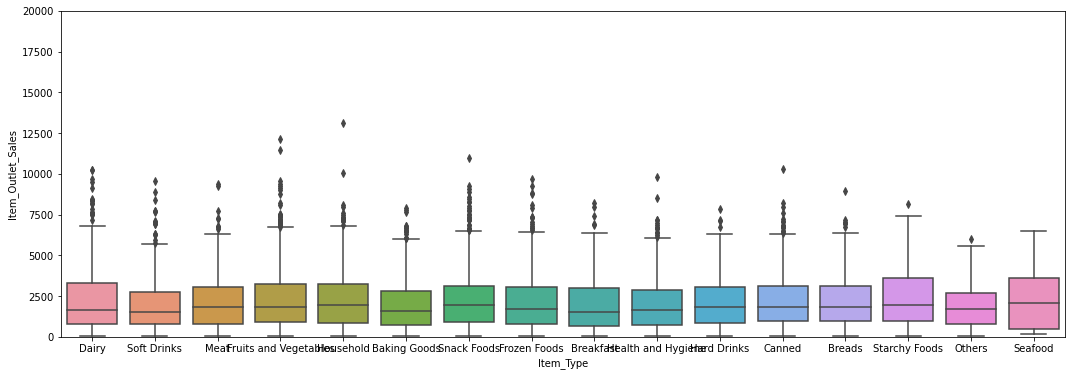

In [19]:
# Box plot of OverallQual vs SalePrice
data = pd.concat([train["Item_Type"], train["Item_Outlet_Sales"]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=data)
fig.axis(ymin=0, ymax=20000)

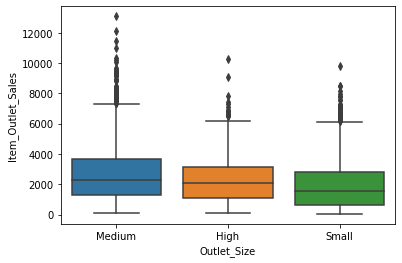

In [20]:
#BOXPLOT ANALYSIS
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = combi)
plt.show()

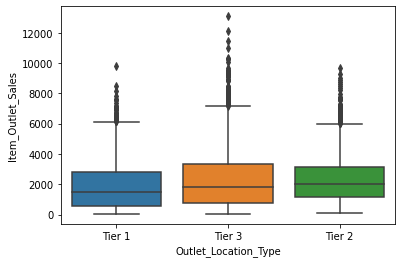

In [21]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = combi)
plt.show()

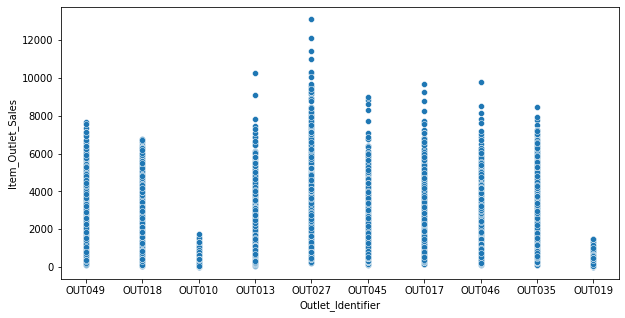

In [22]:
#Scatter plot 
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = combi)
plt.show()

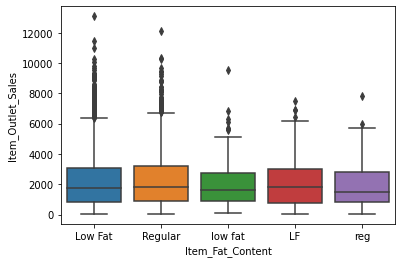

In [23]:
# boxplot 
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = combi)
plt.show()

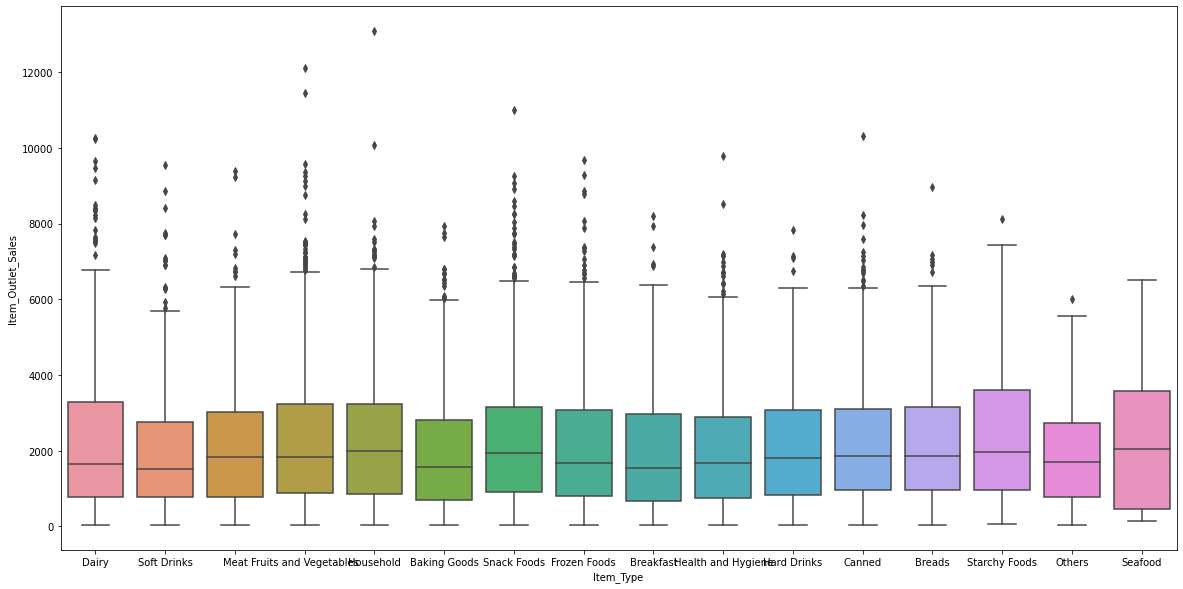

In [24]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = combi)
plt.show()

In [25]:
#Check missing values:
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [26]:
#First  item outlet sales fill with mean :
#and  for variable item weight it also fill with mean :  both are continious variables.
combi["Item_Outlet_Sales"].fillna(combi["Item_Outlet_Sales"].mean(), inplace=True)
combi['Item_Weight'].fillna(combi['Item_Weight'].mean(), inplace=True)

In [27]:
#for outlet size = categorical variable  fill maximum count  category to missing values:
combi['Outlet_Size'].value_counts()
combi['Outlet_Size'].fillna(('Medium'), inplace = True)

In [28]:
#check again null values in data :
combi.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [29]:
 #0 in item visibility isn't practical so treating it as a NaN value. Replacing 0 with NaN
combi["Item_Visibility"].replace(0, np.nan, inplace=True)

In [30]:
#Imputing missing values in item visibillity by median
combi['Item_Visibility'].fillna(combi['Item_Visibility'].median(), inplace=True)
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [31]:
combi["Item_Fat_Content"].replace('LF', 'Low Fat', inplace=True)
combi["Item_Fat_Content"].replace('low fat', 'Low Fat', inplace=True)
combi["Item_Fat_Content"].replace('reg', 'Regular', inplace=True)
combi["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<BarContainer object of 14204 artists>

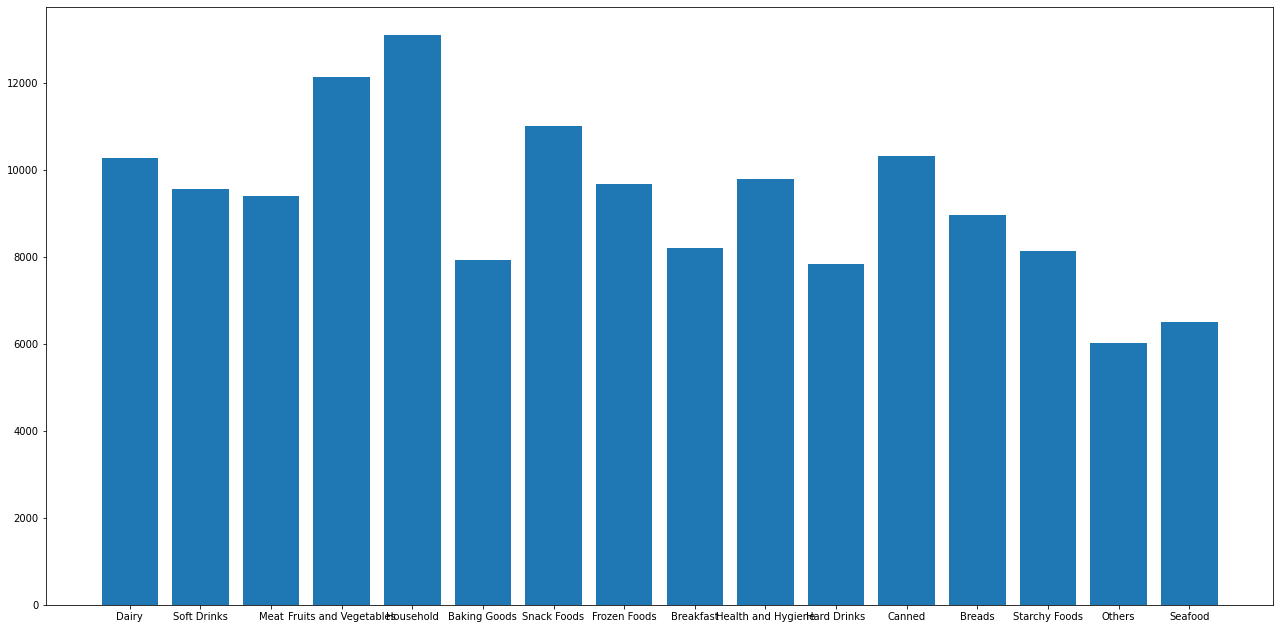

In [32]:
fig, ax = plt.subplots(figsize=(22,11))
plt.bar(combi["Item_Type"],combi["Item_Outlet_Sales"], width = 0.8)

In [33]:
#Household items contribute the most to sales followed by fruits and vegetables.
#INCREASING USABILLITY OF OUTLET ESTABLISHMENT YEAR COLUMN
#ASSUMPTION- OLDER THE OUTLET, MORE FOOTFALL
combi['Year'] = 2013- combi['Outlet_Establishment_Year']
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26


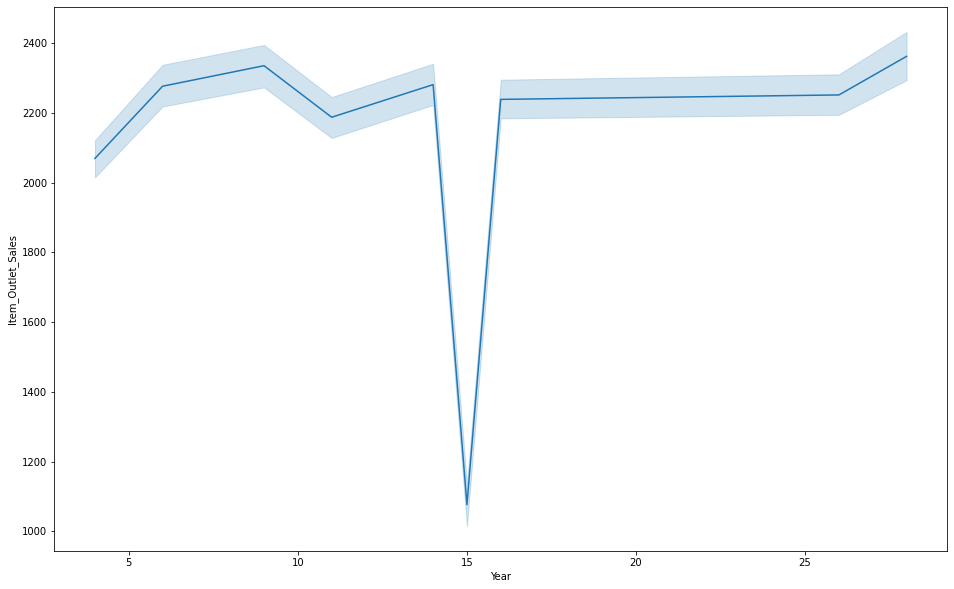

In [34]:
plt.figure(figsize = (16,10))
sns.lineplot(x = 'Year', y = 'Item_Outlet_Sales', data = combi)
plt.show()
#curvve generally shows increasing behavior except while approaching year 15 from LHS.

In [35]:
#Item type combine:
combi['Item_Identifier'].value_counts()
combi['Item_Type_Combined'] = combi['Item_Identifier'].apply(lambda x: x[0:2])
combi['Item_Type_Combined'] = combi['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
combi['Item_Type_Combined'].value_counts()


Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [36]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
combi['Outlet'] = le.fit_transform(combi['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    combi[i] = le.fit_transform(combi[i])

In [37]:
combi = pd.get_dummies(combi, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
combi.head() 

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Year,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.057851,Household,53.8614,OUT013,1987,994.7052,train,26,...,1,0,0,0,1,0,0,0,0,1


In [38]:
#  import warning and preprocessing data:
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Dropping converted columns:
combi.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [40]:
#Dividing into test and train:
train = combi.loc[combi['source']=="train"]
test = combi.loc[combi['source']=="test"]

In [41]:
#Dropping unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [42]:
#Exporting files:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [43]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [44]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,9,1,0,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,3,0,1,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,9,1,0,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.057851,182.0950,OUT010,732.3800,15,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.057851,53.8614,OUT013,994.7052,26,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [45]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [46]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [47]:
#LINEAR REGRESSION
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score 
regressor = LinearRegression()
regressor.fit(X_train, y_train)
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.35

In [68]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics 
import sklearn.metrics as metrics
regressor.predict(X_train)

array([4125.17447454,  790.33079541, 2098.80335758, ..., 1349.51290433,
       1673.98398729, 1068.50676583])

In [54]:
y_pred = regressor.predict(X_test)

In [60]:
test11 = pd.read_csv("/content/Test.csv")
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [61]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [62]:
r2_score(y_train, regressor.predict(X_train))

0.588335434306813

In [69]:
print("RMSE : " , np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE :  1094.8445446843184


In [70]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

In [71]:
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [72]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [73]:
print("RMSE : " ,np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE :  1062.1329991749378
